#**House price Predictor using Machine Learning**

**importing all the necessary libraries**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,QuantileTransformer
%matplotlib inline


**Loading the Data set**

In [4]:
traindf=pd.read_csv('train.csv')
testdf=pd.read_csv('test.csv')

In [5]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
testdf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
traindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
numeric_df=traindf.select_dtypes(include=['int64','float64'])
correlation_matrix=numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [24]:
req_tr=['GarageArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','SalePrice']

In [25]:
selected_tr=traindf[req_tr]

In [26]:
selected_tr.loc[:,'Totalbath']= (selected_tr['BsmtFullBath'].fillna(0)+selected_tr['BsmtHalfBath'].fillna(0)+selected_tr['FullBath'].fillna(0)+selected_tr['HalfBath'].fillna(0))

<ipython-input-26-a99596c42864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:,'Totalbath']= (selected_tr['BsmtFullBath'].fillna(0)+selected_tr['BsmtHalfBath'].fillna(0)+selected_tr['FullBath'].fillna(0)+selected_tr['HalfBath'].fillna(0))


In [27]:
selected_tr.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+selected_tr['1stFlrSF'].fillna(0)+selected_tr['2ndFlrSF'].fillna(0)+selected_tr['LowQualFinSF'].fillna(0)+selected_tr['GrLivArea'])

<ipython-input-27-990e69ebbde8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+selected_tr['1stFlrSF'].fillna(0)+selected_tr['2ndFlrSF'].fillna(0)+selected_tr['LowQualFinSF'].fillna(0)+selected_tr['GrLivArea'])


In [28]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,Totalbath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,4276
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,3786
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,4492
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,4190
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,4247
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,5688
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,5832
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,3234


**keeping only the nessesary columns**

In [29]:
train_df=selected_tr[['TotRmsAbvGrd','Totalbath','TotalSF','GarageArea','OverallQual','SalePrice']]
train_df

,TotRmsAbvGrd,Totalbath,TotalSF,GarageArea,OverallQual,SalePrice
0,8,4,4276,548,7,208500
1,6,3,3786,460,6,181500
2,6,4,4492,608,7,223500
3,7,2,4190,642,7,140000
4,9,4,5541,836,8,250000
...,...,...,...,...,...,...
1455,7,3,4247,460,6,175000
1456,7,3,5688,500,6,210000
1457,9,2,5832,252,7,266500
1458,5,2,3234,240,5,142125


**splitting the dataset and creating a pipeline**

In [31]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(train_df,test_size=0.2,random_state=42)
print(f"Rows in train_set:{len(train_set)}\nRows in test_set:{len(test_set)}\n" )

Rows in train_set:1168
Rows in test_set:292



In [32]:
housing=train_set.drop('SalePrice',axis=1)
housing_labels=train_set['SalePrice'].copy()

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [34]:
x_train=my_pipeline.fit_transform(housing)

In [35]:
x_train

array([[-0.96456591, -0.48377079, -0.13352109, -0.86383727, -0.82044456],
       [ 0.27075534,  0.61127627, -0.13428593, -0.45626397, -0.08893368],
       [-1.58222654, -1.57881784, -1.32207838, -2.25716927, -0.82044456],
       ...,
       [-0.96456591, -0.48377079, -1.16605156,  0.45366713, -0.82044456],
       [ 0.27075534, -0.48377079, -0.26966215, -1.23349678,  0.64257719],
       [ 0.27075534, -0.48377079,  0.28025593,  0.87071888,  0.64257719]])

In [36]:
y_train=housing_labels

In [38]:
y_train.shape

(1168,)

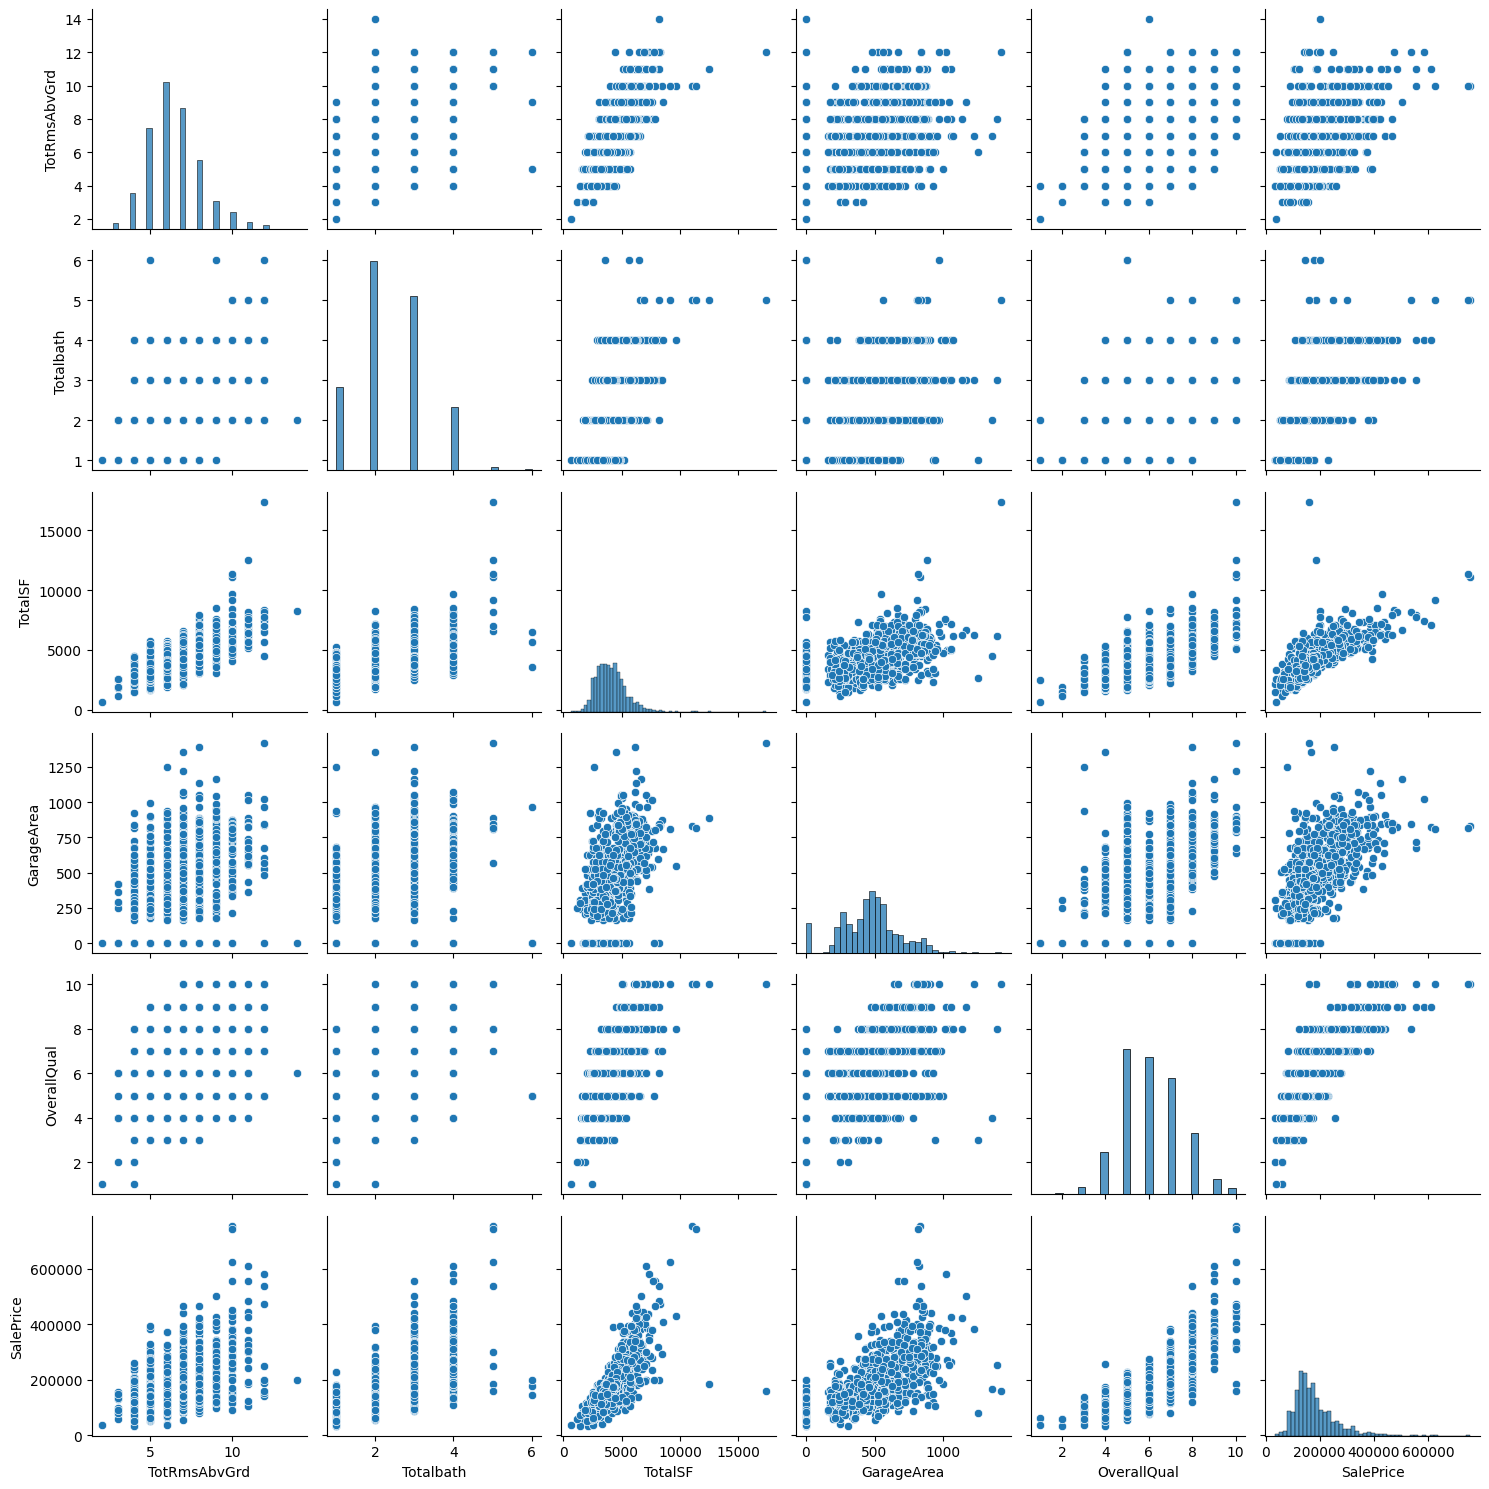

In [39]:
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [40]:
corr_matrix=train_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.773909
GarageArea      0.623431
Totalbath       0.613005
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

<Axes: >

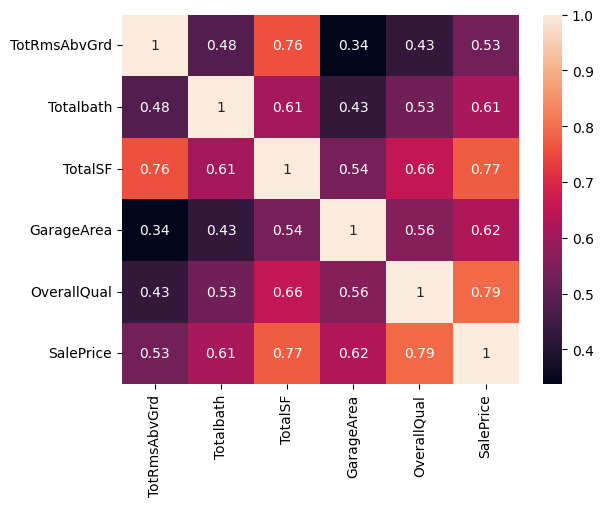

In [42]:
sns.heatmap(train_df.corr(),annot=True)

**Working with test DataFrame**

loading test dataset

In [43]:
testdf=pd.read_csv('test.csv')

In [46]:
testdf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
req_tst=['GarageArea','OverallQual','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd']

In [57]:
selected_tst=testdf[req_tst]

In [58]:
selected_tst.loc[:,'Totalbath']= (selected_tr['BsmtFullBath'].fillna(0)+selected_tr['BsmtHalfBath'].fillna(0)+selected_tr['FullBath'].fillna(0)+selected_tr['HalfBath'].fillna(0))

<ipython-input-58-69c014fb72ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:,'Totalbath']= (selected_tr['BsmtFullBath'].fillna(0)+selected_tr['BsmtHalfBath'].fillna(0)+selected_tr['FullBath'].fillna(0)+selected_tr['HalfBath'].fillna(0))


In [59]:
selected_tst.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+selected_tr['1stFlrSF'].fillna(0)+selected_tr['2ndFlrSF'].fillna(0)+selected_tr['LowQualFinSF'].fillna(0)+selected_tr['GrLivArea'])

<ipython-input-59-53d60b5f2de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+selected_tr['1stFlrSF'].fillna(0)+selected_tr['2ndFlrSF'].fillna(0)+selected_tr['LowQualFinSF'].fillna(0)+selected_tr['GrLivArea'])


In [60]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Totalbath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,4,4276
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,3,3786
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,4,4492
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,2,4190
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,4,5541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,3,3663
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,3,4247
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,3,5688
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2,5832


In [61]:
test_df_unproc=selected_tst[['TotRmsAbvGrd','Totalbath','GarageArea','TotalSF','OverallQual']]

In [62]:
test_df_unproc

,TotRmsAbvGrd,Totalbath,GarageArea,TotalSF,OverallQual
0,5,4,730.0,4276,5
1,6,3,312.0,3786,6
2,6,4,482.0,4492,5
3,7,2,470.0,4190,6
4,5,4,506.0,5541,8
...,...,...,...,...,...
1454,5,3,0.0,3663,4
1455,6,3,286.0,4247,4
1456,7,3,576.0,5688,5
1457,6,2,0.0,5832,5


In [63]:
test_df=test_df_unproc.fillna(test_df_unproc.mean())

In [66]:
x_test=my_pipeline.transform(test_df[['TotRmsAbvGrd','Totalbath','GarageArea','TotalSF','OverallQual']].values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [67]:
x_test

array([[-0.96456591,  1.70632332, -2.59017876, 18.00775457, -0.82044456],
       [-0.34690528,  0.61127627, -2.90988079, 15.68553458, -0.08893368],
       [-0.34690528,  1.70632332, -2.77985843, 19.03142706, -0.82044456],
       ...,
       [ 0.27075534,  0.61127627, -2.70796372, 24.69953952, -0.82044456],
       [-0.34690528, -0.48377079, -3.14851005, 25.38198785, -0.82044456],
       [ 1.50607659, -0.48377079, -2.65136575, 13.06948267,  0.64257719]])

#**Model Selection**

In [70]:
model=LinearRegression()
model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
y_train_pred=model.predict(x_train)

In [73]:
y_train_pred[:5]

array([147083.68, 171468.9 ,  92555.  , 168620.24, 142410.  ])

In [74]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [75]:
proc_data=my_pipeline.transform(some_data)

In [76]:
model.predict(proc_data)

array([147083.68, 171468.9 ,  92555.  , 168620.24, 142410.  ])

In [77]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [78]:
train_mse=mean_squared_error(y_train,y_train_pred)
train_rmse=np.sqrt(train_mse)

In [79]:
print(f"Training_mse:{train_mse:.2f},Training_rmse:{train_rmse:.2f}")

Training_mse:185223852.63,Training_rmse:13609.70


In [80]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=200)
rmse_scores=np.sqrt(-scores)


In [81]:
rmse_scores

array([ 22392.17812884,  13375.26688847,  24749.52799159,  14737.50309726,
        47729.69811282,  10390.79425428,  21018.65086591,  11981.69150666,
        11832.15216688,  55351.47565187,  37512.74818585,  27978.82295512,
        13625.53788639,   8546.12853511,  21473.19127378,  22189.88912031,
        21861.87184775,  32636.02322924,  37213.94005942,  23441.63722095,
        29702.04194346,  16778.87845122,  18582.49106037,  27003.42116298,
        17986.6003959 ,  18252.95999204,  42821.74443885,  37750.19699057,
       189234.99962752,  51669.20638227,  21691.94717243,  33311.23755255,
        22683.39060635,  30786.18754504,  49634.20412175,  13491.15253052,
        26452.39375331,  29992.30030666,  18193.46347816,  34169.79554702,
        19593.52023376,  32732.11919635,  27046.22065748,  36333.24995205,
        33645.08338515,  27587.9453373 ,  26317.75253089,  43975.01172789,
        22156.42831952,  21329.78391954,  21074.68720227,  51629.60332193,
        38448.64203617,  

In [83]:
def print_scores(scores):
  print("Scores:",scores)
  print("mean:",scores.mean())
  print("standard deviation:",scores.std())


In [84]:
print_scores(rmse_scores)

Scores: [ 22392.17812884  13375.26688847  24749.52799159  14737.50309726
  47729.69811282  10390.79425428  21018.65086591  11981.69150666
  11832.15216688  55351.47565187  37512.74818585  27978.82295512
  13625.53788639   8546.12853511  21473.19127378  22189.88912031
  21861.87184775  32636.02322924  37213.94005942  23441.63722095
  29702.04194346  16778.87845122  18582.49106037  27003.42116298
  17986.6003959   18252.95999204  42821.74443885  37750.19699057
 189234.99962752  51669.20638227  21691.94717243  33311.23755255
  22683.39060635  30786.18754504  49634.20412175  13491.15253052
  26452.39375331  29992.30030666  18193.46347816  34169.79554702
  19593.52023376  32732.11919635  27046.22065748  36333.24995205
  33645.08338515  27587.9453373   26317.75253089  43975.01172789
  22156.42831952  21329.78391954  21074.68720227  51629.60332193
  38448.64203617  36236.76845774  21183.42450636  28989.69711654
  10455.93867229  26921.14226143  27405.09651068  31007.84007183
 189311.99727203 

In [85]:
y_pred=model.predict(x_test)

In [86]:
y_pred

array([124494.495, 125872.165, 123746.665, ..., 123784.665, 116771.   ,
       132365.5  ])

In [87]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','salePrice']
datasets.to_csv('submission.csv',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')